<a href="https://colab.research.google.com/github/mtfaye/data-analyst-challenge/blob/master/Mistplay_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mistplay - Data Analyst Challenge


In [0]:
import json
import pandas as pd 

## 1 - Plot Difference in ltv, ttime, and tue across AB groups

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/Data analyst challenge/takeHome.csv')

In [92]:
 # Quick overview of the dataset
df

,ltv,ttime,abt,tue
0,"{""n"":""250""}","{""n"":""1077572""}","{""n"":""31""}","{""n"":""38""}"
1,"{""n"":""49""}","{""n"":""60028""}","{""n"":""32""}","{""n"":""15""}"
2,"{""n"":""680""}","{""n"":""2018285""}","{""n"":""7""}","{""n"":""46""}"
3,"{""n"":""125""}","{""n"":""98142""}","{""n"":""11""}","{""n"":""15""}"
4,"{""n"":""450""}","{""n"":""115692""}","{""n"":""9""}","{""n"":""15""}"
...,...,...,...,...
9994,"{""n"":""250""}","{""n"":""4002074""}","{""n"":""23""}","{""n"":""127""}"
9995,"{""n"":""250""}","{""n"":""2134787""}","{""n"":""28""}","{""n"":""53""}"
9996,"{""n"":""150""}","{""n"":""107426""}","{""n"":""53""}","{""n"":""15""}"
9997,"{""n"":""72""}","{""n"":""0""}","{""n"":""26""}","{""n"":""15""}"


In [93]:
df.dtypes

ltv      object
ttime    object
abt      object
tue      object
dtype: object

In [94]:
# Clean up dataset 
df = df.replace(['{', '"', ':', 'n', '}'], ' ', regex=True)
df

,ltv,ttime,abt,tue
0,250,1077572,31,38
1,49,60028,32,15
2,680,2018285,7,46
3,125,98142,11,15
4,450,115692,9,15
...,...,...,...,...
9994,250,4002074,23,127
9995,250,2134787,28,53
9996,150,107426,53,15
9997,72,0,26,15


In [95]:
# Verify if any missing values in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 4 columns):
ltv      9998 non-null object
ttime    9999 non-null object
abt      9999 non-null object
tue      9997 non-null object
dtypes: object(4)
memory usage: 312.6+ KB


In [96]:
# Let's convert the data types from string to float to simplify our 
# analysis as no unit or descriptions of the attributes were given. 
df = df.astype({'ltv': float ,'ttime': float, 'abt': float, 'tue':float})
df.dtypes

ltv      float64
ttime    float64
abt      float64
tue      float64
dtype: object

In [259]:
df.describe()

,ltv,ttime,abt,tue
count,9998.000000,9.999000e+03,9999.000000,9997.000000
mean,388.522505,1.454586e+07,30.288329,193.510453
std,417.663415,6.360238e+07,17.405711,551.007782
min,0.000000,0.000000e+00,1.000000,15.000000
25%,200.000000,1.140965e+05,15.000000,15.000000
50%,250.000000,8.473500e+05,30.000000,33.000000
75%,450.000000,4.448765e+06,45.000000,118.000000
max,8481.000000,1.735807e+09,60.000000,10563.000000


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
# Lets see if is there any linear relationships between the attributes
df.corr().style.format("{:.2}").background_gradient\
(cmap=plt.get_cmap('coolwarm'), axis=1)

,ltv,ttime,abt,tue
ltv,1.0,0.43,-0.0066,0.58
ttime,0.43,1.0,-0.017,0.81
abt,-0.0066,-0.017,1.0,-0.035
tue,0.58,0.81,-0.035,1.0


### Let's visualize their distributions and difference across ABgroups.

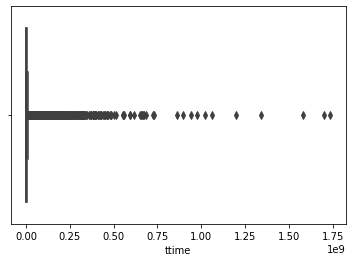

In [194]:
sns.boxplot(df.ttime)

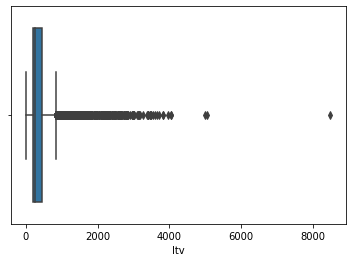

In [197]:
sns.boxplot(df.ltv)

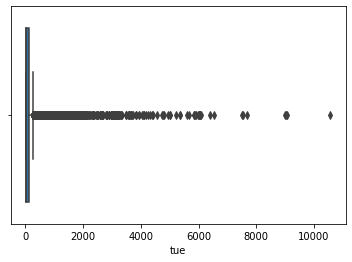

In [198]:
sns.boxplot(df.tue)

##  2 - Identify patterns in the device contents:

In [0]:
df_2 = pd.read_csv('/content/drive/My Drive/Data analyst challenge/sts.csv')

In [110]:
df_2

,state,sts
0,"{""n"":""1""}","{""m"":{""com.utorrent.client.pro"":{""m"":{""d30"":{""..."
1,"{""n"":""1""}","{""m"":{""com.tetherstudios.solitaire.klondike"":{..."
2,"{""n"":""0""}","{""m"":{""com.ticketmaster.mobile.android.na"":{""m..."
3,"{""n"":""0""}","{""m"":{""com.ticketmaster.mobile.android.na"":{""m..."
4,"{""n"":""1""}","{""m"":{""flipboard.boxer.app"":{""m"":{""d30"":{""n"":""..."
...,...,...
6086,"{""n"":""1""}","{""m"":{""com.trustonic.tuiservice"":{""m"":{""cat"":{..."
6087,"{""n"":""1""}","{""m"":{""com.barclays.apps.pingit"":{""m"":{""cat"":{..."
6088,"{""n"":""1""}","{""m"":{""com.fungames.sniper3d"":{""m"":{""cat"":{""s""..."
6089,"{""n"":""1""}","{""m"":{""com.fungames.sniper3d"":{""m"":{""d30"":{""n""..."


In [258]:
#View of the first full row
df_2.loc[0, :]

state                                                  1  
sts      {"m":{"com.utorrent.client.pro":{"m":{"d30":{"...
Name: 0, dtype: object

The column sts is in sring format but contains a dict.

In [0]:
df_2['state'] = df_2['state'].replace(['{', '"', ':', 'n', '}'], ' ', regex=True)

In [115]:
#Lets count the number of gift card rejected
df_2.state.value_counts()

      1      5631
      2       245
      0       215
Name: state, dtype: int64

In [203]:
# Lets filter all the rejected gift card
df_reject = df_2.state.str.contains('2')
df_2[df_reject]

,state,sts
139,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
180,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
276,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
286,2,"{""m"":{""com.scopely.whiplash"":{""m"":{""cat"":{""s"":..."
340,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
...,...,...
5787,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
5805,2,"{""m"":{""com.ea.game.starwarscapital_row"":{""m"":{..."
5944,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
5966,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."


In [176]:
type(df_2[df_reject].sts)  #Pandas series

pandas.core.series.Series

We need to filter the keys of the dictionary and look into the frequency of their key values ts, fi, lu and lc. That would return us a certains pattern of the content devices for all the rejected gift card.



In [248]:
# Convert to a dict and iterate to key a list of key values 
type(pd.Series.to_dict(df_2[df_reject].sts))

dict

In [0]:
my_dict = pd.Series.to_dict(df_2[df_reject].sts)

In [257]:
next(iter(my_dict.items()))

(139,
 '{"m":{"com.epicactiononline.ffxv.ane":{"m":{"d30":{"n":"60601463"},"d7":{"n":"60601463"},"cat":{"s":"strategy"},"lc":{"n":"46"},"stamp":{"n":"1548540127985"},"lu":{"n":"1548509034183"},"fp":{"n":"1548075016570"},"d1":{"n":"5009550"}}},"com.jellybtn.cashkingmobile":{"m":{"d30":{"n":"30312941"},"d7":{"n":"30312941"},"cat":{"s":"casual"},"lc":{"n":"12"},"stamp":{"n":"1548540127985"},"lu":{"n":"1548509075515"},"fp":{"n":"1548076453185"},"d1":{"n":"2656549"}}},"com.playstudios.popslots":{"m":{"d30":{"n":"32366669"},"d7":{"n":"32366669"},"cat":{"s":"casino"},"lc":{"n":"12"},"stamp":{"n":"1548540127985"},"lu":{"n":"1548509119356"},"fp":{"n":"1548077077044"},"d1":{"n":"2843502"}}},"com.privateinternetaccess.android":{"m":{"cat":{"s":"notgame"},"stamp":{"n":"1548073493258"},"fp":{"n":"1546334839364"}}},"com.scopely.yux":{"m":{"d30":{"n":"195049040"},"d7":{"n":"195049040"},"cat":{"s":"board"},"lc":{"n":"12"},"stamp":{"n":"1548540127985"},"lu":{"n":"1548540120593"},"fp":{"n":"154807411945